## Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-bright','dark_background'])

In [18]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [20]:
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80,stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((17653, 19), (4414, 19), (17653,), (4414,))

In [23]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf = DTC(class_weight = 'balanced')
clf = DTC()

In [24]:
clf.fit(x_train, y_train)
pred = clf.predict(x_train)

In [25]:
from sklearn.metrics import classification_report as clfr
print(clfr(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [26]:
pred_test = clf.predict(x_test)
print(clfr(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3559
           1       0.42      0.44      0.43       855

    accuracy                           0.77      4414
   macro avg       0.64      0.65      0.64      4414
weighted avg       0.78      0.77      0.78      4414



In [27]:
!pip install graphviz

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file = 'tree.dot',max_depth = None, feature_names = X.columns, label = None, impurity = False)

In [29]:
# from graphviz import render
# render(filepath = 'tree',format = 'png', engine = 'neato')

In [30]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
    
    model.fit(x1,y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1,predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    
    return f1, f2

In [31]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize=(5,5))
    plt.plot(x_axis, train_score, color = 'red', label = 'train score')
    plt.plot(x_axis, test_score, color = 'blue', label = 'test score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter value')
    plt.ylabel('f1 score')
    plt.show()

In [32]:
maxdepth = [i for i in range(1,50)]

train  = []
test = []
for i in maxdepth:
    model = DTC(class_weight = 'balanced', max_depth = i, random_state = 42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

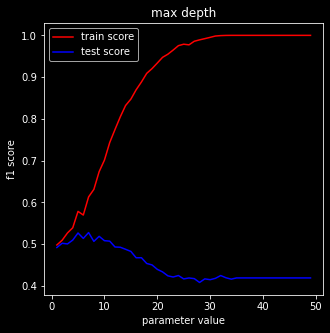

In [33]:
effect(train, test, range(1,50), 'max depth')

In [35]:
min_samples = [i for i in range(2,5000, 25)]

train  = []
test = []
for i in min_samples:
    model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

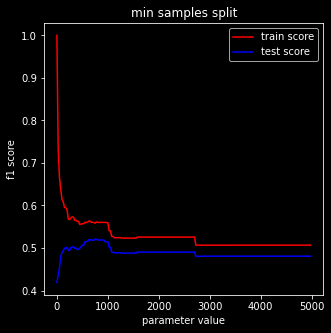

In [36]:
effect(train, test, range(2,5000,25), 'min samples split')

In [37]:
maxleafnodes = [i for i in range(2,200,10)]

train  = []
test = []
for i in maxleafnodes:
    model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

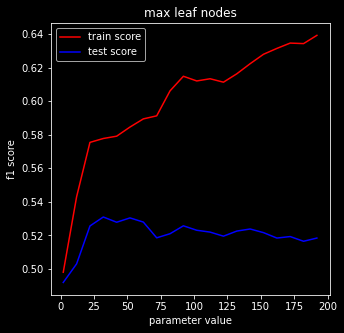

In [38]:
effect(train, test, range(2,200,10), 'max leaf nodes')

In [39]:
minsamplesleaf = [i for i in range(2,4000,25)]

train  = []
test = []
for i in minsamplesleaf:
    model = DTC(class_weight = 'balanced', min_samples_leaf = i, random_state = 42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

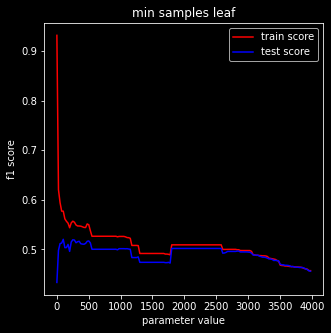

In [40]:
effect(train, test,range(2,4000,25), 'min samples leaf')

In [42]:
model = DTC(max_depth = 9)
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
k = feature_imp.sort_values()

Text(0.5, 1.0, 'feature importance')

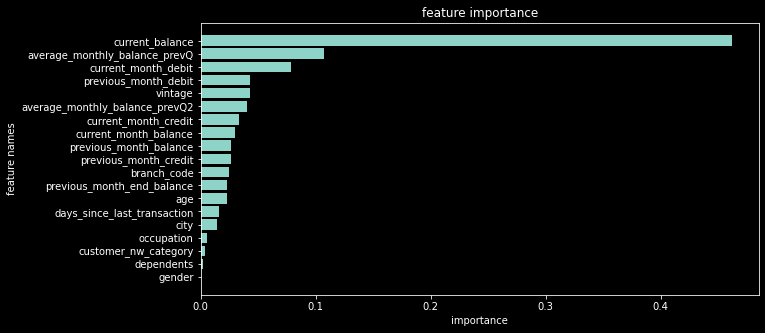

In [43]:
plt.figure(figsize = (10,5))
plt.barh(k.index, k)
plt.xlabel('importance')
plt.ylabel('feature names')
plt.title('feature importance')